
# The Android App Market on Google Play

## Project Description
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

apps.csv: contains all the details of the apps on Google Play. These are the features that describe an app.

user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.

## Objective
Data wrangling, create visualizations, and carry out a descriptive and inferential analysis.
Load, clean, and visualize scraped Google Play Store data to gain insights into the Android app market.

##### Task 1: Instructions
Import the data, drop duplicate rows, and inspect the data.

Load datasets/apps.csv into a DataFrame and assign it to the variable apps_with_duplicates.
Drop all duplicate rows from apps_with_duplicates and assign the result to apps.
Print the total number of apps.
Finally, display a random sample of 5 rows from apps.

In [1]:
#importing necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the datasets from my Github

In [2]:
url_app = 'https://raw.githubusercontent.com/Iyadvnni/Google-Play-Store-Dataset/main/googleplaystore.csv'

In [3]:
#Reading in the Google playstore Dataset
apps_with_duplicates = pd.read_csv(url_app) #Dataset is stored in a pandas DataFrame
apps_with_duplicates.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
1,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,"1,000,000+",Free,0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100+,Free,0,Everyone,Sports,17-May-18,4.6,4.3 and up


#Read in the csv file as a dataframe called df


In [4]:
df = pd.read_csv(url_app)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
1,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,"1,000,000+",Free,0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100+,Free,0,Everyone,Sports,17-May-18,4.6,4.3 and up


In [5]:
#check for missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
#check for the total number of Apps in the dataset
print ('Total number of apps in the dataset = ', len(df))

Total number of apps in the dataset =  10841


In [7]:
#check for duplicate values
df.duplicated().sum()

483

In [8]:
#remove duplicate values
df= df.drop_duplicates() 
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
1,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,"1,000,000+",Free,0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100+,Free,0,Everyone,Sports,17-May-18,4.6,4.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,ZUL - Rotativo Digital BH,AUTO_AND_VEHICLES,4.2,29,Varies with device,"10,000+",Free,0,Everyone,Auto & Vehicles,1-Aug-18,1.6.5,4.1 and up
10837,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,4.5,28560,Varies with device,"1,000,000+",Free,0,Everyone,Shopping,23-Jul-18,Varies with device,Varies with device
10838,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,4.4,11200,25M,"1,000,000+",Free,0,Everyone,House & Home,16-Jul-18,4.5.15,5.0 and up
10839,Zynga Poker – Texas Holdem,GAME,4.4,1986068,52M,"50,000,000+",Free,0,Teen,Casino,25-Jul-18,21.54,4.1 and up


In [9]:
#the total number of app after removing duplicate values
print ('Total number of apps in the dataset = ', len(df))

Total number of apps in the dataset =  10358


In [10]:
# checking for a random sample of the dataset
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5149,FP Click sound changer,PERSONALIZATION,3.5,178,1.4M,"10,000+",Free,0,Everyone,Personalization,26-Dec-15,1,1.6 and up
6818,m:go BiH,COMMUNICATION,3.2,559,6.0M,"10,000+",Free,0,Everyone,Communication,25-Jul-18,3.4,3.0 and up
7984,Periscope - Live Video,SOCIAL,4.0,479908,15M,"10,000,000+",Free,0,Mature 17+,Social,9-Jul-18,1.23.3.0,4.4 and up
5865,High School Simulator 2017,FAMILY,4.2,123136,80M,"5,000,000+",Free,0,Mature 17+,Simulation,25-Jun-18,1,4.0 and up
1729,BN Pro Battery Level-White,LIBRARIES_AND_DEMO,NaN,21,200k,"5,000+",Free,0,Everyone,Libraries & Demo,5-Feb-17,2.3.2,1.6 and up


In [11]:
#checking for missing value
df.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 2. Data cleaning

columns like Installs and Price have a few special characters (+ , $ ) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. 
 
# List of characters to remove
chars_to_remove = ['+', ',', '$']
### List of column names to clean
Installs, Price

#### Task 2: Instructions
Clean the dataset.

Create a list named chars_to_remove that contains the following characters: + , and $.
Create a list named cols_to_clean that contains the following column names: Installs and Price.
For each column in cols_to_clean in the apps DataFrame, replace each character in chars_to_remove with the empty string ''.

In [12]:
#a. Remove special characters from the columns Install and Price

In [13]:
special_chars = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
 
for char in special_chars:
    for cols in cols_to_clean:
        df[cols] = df[cols].apply(lambda x: x.replace(char, ''))

In [14]:
#b. To confirm special characters have been removed

In [15]:
#checking the 'Installs' and 'Price' column
df[['Installs', 'Price']]

,Installs,Price
0,500,0
1,10000,0
2,10000,0
3,1000000,0
4,100,0
...,...,...
10836,10000,0
10837,1000000,0
10838,1000000,0
10839,50000000,0


In [16]:
# Print summary of a dataframe

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Correcting data types, installs and price are numeric values hence, int or float

#### Task 3: Instructions
Convert Installs and Price columns to float data type using astype() function.
Verify the corrected data types by using the dtypes attribute of apps dataframe. (You can also reuse the info() function to verify the corrected data types)


In [18]:
#To check data type in the original dataset
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
#unique value of the installs column
df['Installs'].unique()

array(['500', '10000', '1000000', '100', '500000', '1000', '5000',
       '100000', '10000000', '50000', '5', '10', '50000000', '100000000',
       '5000000', '1', '50', '0', '500000000', '1000000000', 'Free'],
      dtype=object)

In [20]:
#replacing the free in the install column to 0
df['Installs'].replace({'Free':0},inplace=True)

In [21]:
# converting the install column to float data type
df['Installs']= df['Installs'].astype(float)

In [22]:
#replacing the everyone in the price column to 0
df['Price'].replace({'Everyone':0},inplace=True)

In [23]:
# converting the install price to float data type
df['Price']= df['Price'].astype(float)

In [24]:
#checking the info to confirm the type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


### 4. Exploring app categories
 #### Task 4: Instructions
Create data for a bar chart that shows the distribution of apps across different categories.

Find the number of unique app categories. Save your result in num_categories.
Count the number of apps in each category and then sort the categories in descending order of app count. Save your answer in sorted_num_apps_in_category.

In [25]:
#checking the unique no in the category column
num_category = df['Category'].nunique()
num_category

34

In [26]:
#checking the Category value counts to know the number of apps in each category and sorting it
app_no= df['Category'].value_counts().sort_values(ascending = False).reset_index()
app_no

,index,Category
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


In [27]:
#Renaming the column names appropriately 
app_no.columns = ['Category', 'Count']
app_no

,Category,Count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


In [28]:
#droping index 33
app_no = app_no.drop([33])

In [29]:
app_no

,Category,Count
0,FAMILY,1943
1,GAME,1121
2,TOOLS,843
3,BUSINESS,427
4,MEDICAL,408
5,PRODUCTIVITY,407
6,PERSONALIZATION,388
7,LIFESTYLE,373
8,COMMUNICATION,366
9,FINANCE,360


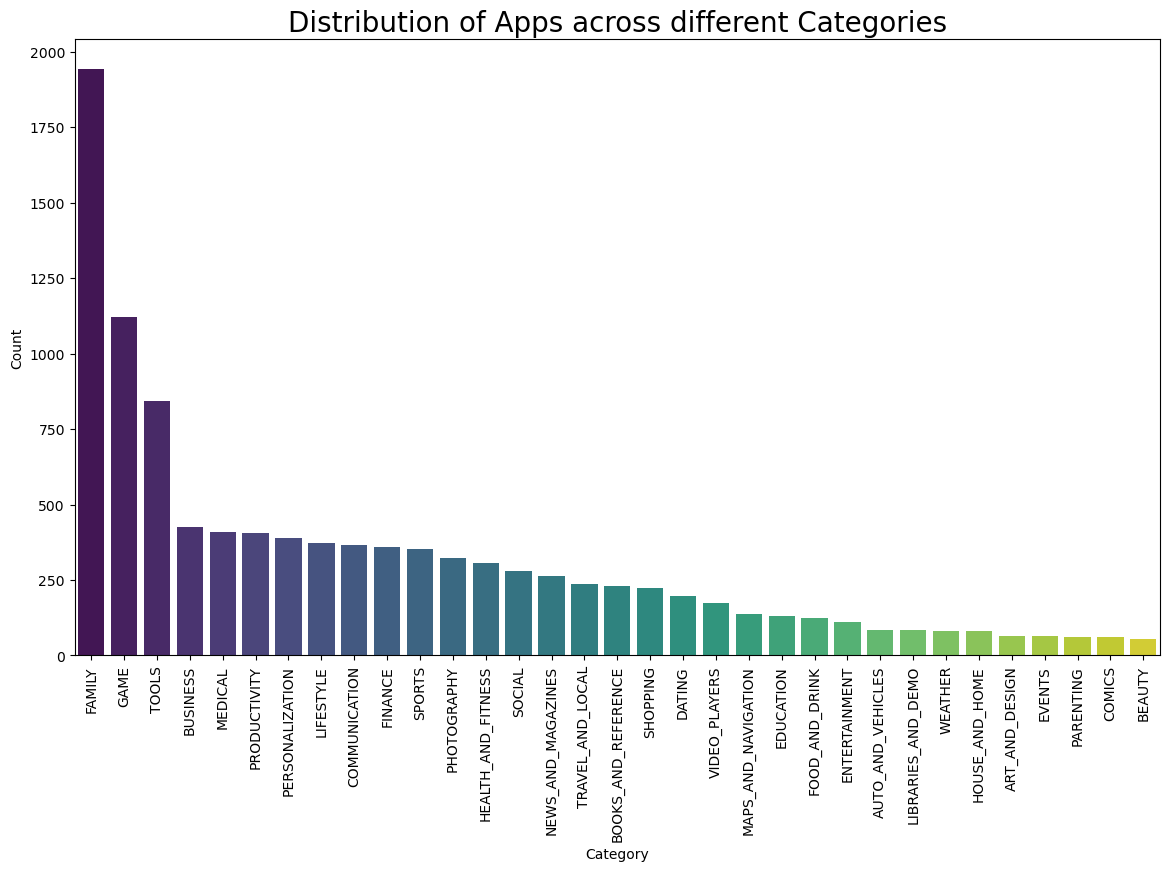

In [30]:
#ploting Apps against categories
figure = plt.figure(figsize = (14, 8))
plt.xticks(rotation = 90)
title = plt.title('Distribution of Apps across different Categories', color = 'black', fontsize = 20)
sns.barplot(data = app_no, x = 'Category', y = 'Count', palette = 'viridis')
plt.show()

## 5. Distribution of app ratings
#### Task 5: Instructions
Create a plot annotation for average app rating.

Find the average app rating and assign it to avg_app_rating

In [31]:
df['Rating'].unique()

array([ nan,  4.5,  4.7,  3.6,  3.2,  3.9,  4.2,  4. ,  4.4,  2.9,  4.6,
        4.1,  3.5,  3.7,  3.8,  4.8,  3. ,  4.3,  5. ,  3.1,  2.3,  1.7,
        3.4,  4.9,  3.3,  1.6,  2.8,  2.7,  2. ,  2.2,  2.4,  2.6,  2.5,
        2.1,  1.4,  1. ,  1.8,  1.9,  1.5,  1.2, 19. ])

In [32]:
# Mean of Rating including the NaN
avr_Rating = df['Rating'].mean()
avr_Rating

4.189542336669279

In [33]:
#Replacing the NaN with the mean of the rating
#values = avr_Rating
#df['Rating'].fillna(value=values,inplace=True)

In [34]:
#confirming if the values have been filled
#df['Rating'].isna().sum()

In [35]:
# the mean of the Rating after changing the NaN value
#ave_app_rating = df['Rating'].mean()
#ave_app_rating


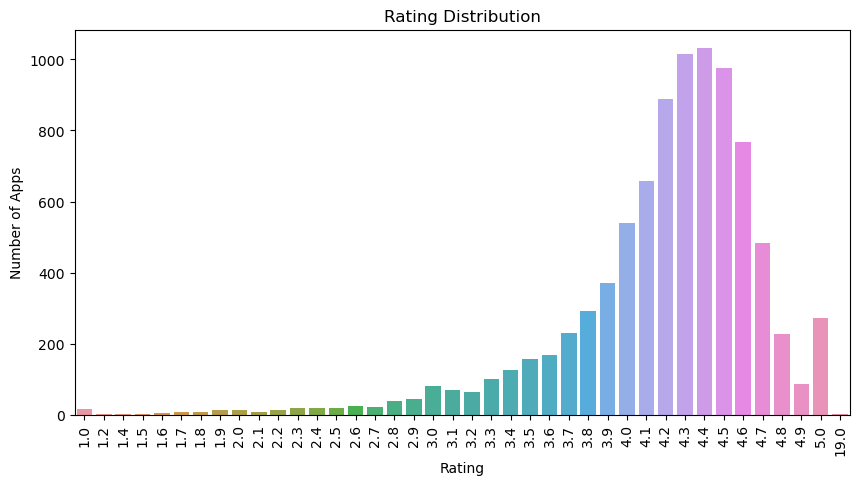

In [36]:
 #show the distribution of rating
 plt.figure(figsize=(10, 5))
 sns.countplot(x='Rating', data=df)
 plt.title('Rating Distribution')
 plt.xticks(rotation=90)
 plt.ylabel('Number of Apps')
 plt.show()

In [37]:
#The count plot is skewed to the left indicating that the majority of the apps are highly rated 
#with only a few exceptions in the low-rated apps.

## 6.Size and price of an app
#### Task 6: Instructions
Examine the relationship between size, price, and rating of apps using jointplot().

Recall from Task #1 that we had observed some missing values in the Rating and Size columns. To make rational decisions, it is important that we do not consider these missing values in our analysis. We will work with a subset apps_with_size_and_rating_present DataFrame for this task.

Select rows from apps where both Rating and Size values are present, ie - they are not null. Store the result in the apps_with_size_and_rating_present dataframe.
From apps_with_size_and_rating_present, select the categories having atleast 250 apps. Assign the result to large_categories dataframe.
Fill out x and y to create a joint plot of Rating as a function of Size.
From apps_with_size_and_rating_present dataframe, select all Paid apps. Save the result in paid_apps.
Fill out x and y to create a joint plot of Rating as a function of Price.

In [38]:
#creating a new df where the NaN ROWS are droped
df_noNaN= df.dropna()
df_noNaN

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,.R,TOOLS,4.5,259,203k,10000.0,Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,10000.0,Free,0.0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,1000000.0,Free,0.0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100.0,Free,0.0,Everyone,Sports,17-May-18,4.6,4.3 and up
6,[root] Pry-Fi,TOOLS,3.9,6736,72k,500000.0,Free,0.0,Everyone,Tools,2-Feb-14,1.2,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,ZUL - Rotativo Digital BH,AUTO_AND_VEHICLES,4.2,29,Varies with device,10000.0,Free,0.0,Everyone,Auto & Vehicles,1-Aug-18,1.6.5,4.1 and up
10837,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,4.5,28560,Varies with device,1000000.0,Free,0.0,Everyone,Shopping,23-Jul-18,Varies with device,Varies with device
10838,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,4.4,11200,25M,1000000.0,Free,0.0,Everyone,House & Home,16-Jul-18,4.5.15,5.0 and up
10839,Zynga Poker – Texas Holdem,GAME,4.4,1986068,52M,50000000.0,Free,0.0,Teen,Casino,25-Jul-18,21.54,4.1 and up


In [39]:
#confirming the NaN as been dropped
df_noNaN.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [40]:
#categories with atleast 250 apps
large_category  = df_noNaN.groupby('Category').filter(lambda App : len(App) >= 250)
large_category 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,.R,TOOLS,4.5,259,203k,10000.0,Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.7,573,53M,10000.0,Free,0.0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.6,21433,21M,1000000.0,Free,0.0,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.2,4,5.6M,100.0,Free,0.0,Everyone,Sports,17-May-18,4.6,4.3 and up
6,[root] Pry-Fi,TOOLS,3.9,6736,72k,500000.0,Free,0.0,Everyone,Tools,2-Feb-14,1.2,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000.0,Free,0.0,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
10831,Zooper Widget,PERSONALIZATION,4.0,30498,5.9M,1000000.0,Free,0.0,Everyone,Personalization,11-Mar-15,2.6,3.2 and up
10832,Zoopla Property Search UK - Home to buy & rent,LIFESTYLE,4.1,21195,Varies with device,1000000.0,Free,0.0,Everyone,Lifestyle,22-Jun-18,Varies with device,Varies with device
10835,Zowi App,FAMILY,4.5,516,21M,50000.0,Free,0.0,Everyone,Education;Education,21-Dec-16,1.4.1,4.0.3 and up


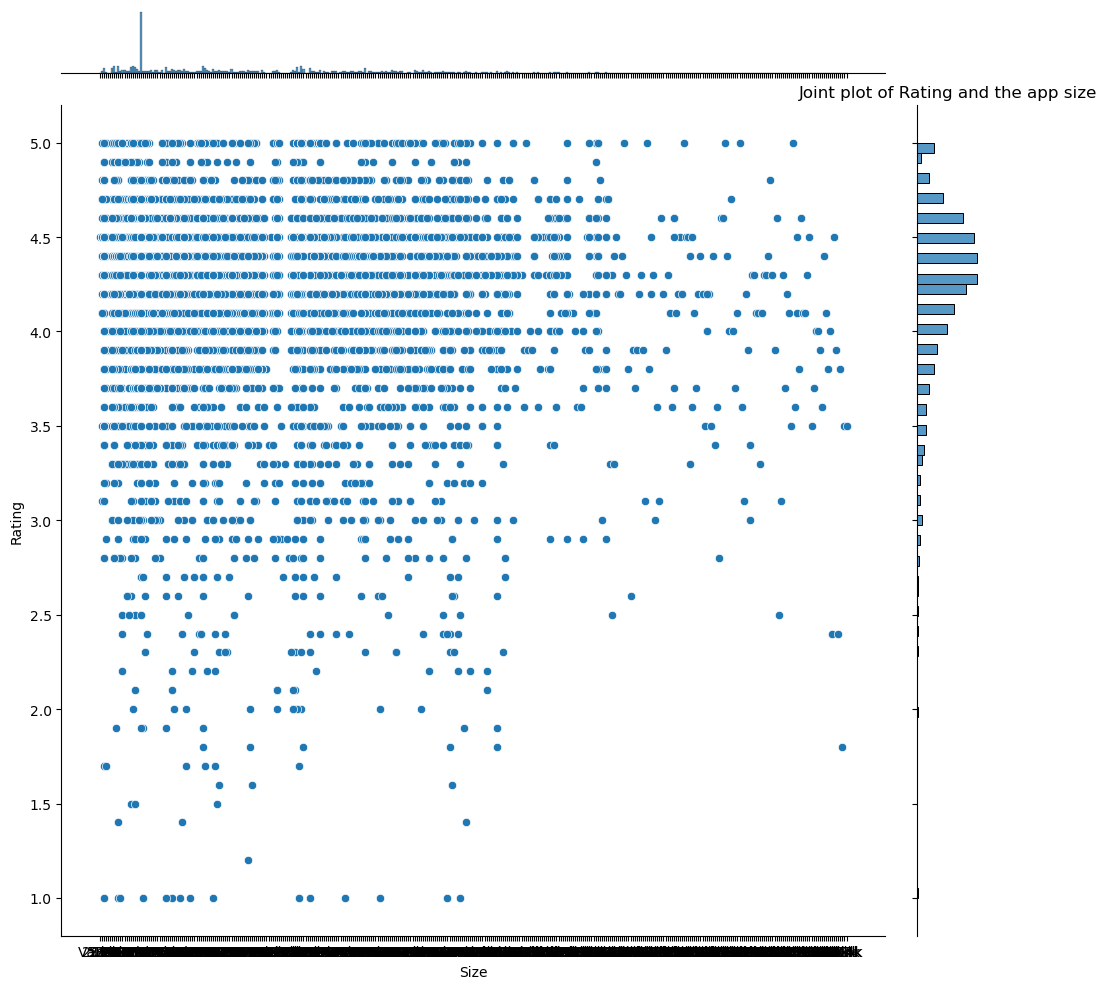

In [41]:
# Plot size vs. rating
sizevsrating = sns.jointplot(x = large_category['Size'], y = large_category['Rating'],height=10, ratio=9, space=0.5,)
plt.title('Joint plot of Rating and the app size')
plt.show()

In [42]:
#creating a df called paid app to show the apps that are paid for
paid_app =df_noNaN[df_noNaN['Type']=='Paid']
paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8,[Sub/EMUI] P Pro - EMUI 8.1/8.0/5.X Theme,PERSONALIZATION,4.0,13,19M,100.0,Paid,0.99,Everyone,Personalization,20-Jul-18,H7SubTV0.1_TV0.4,7.0 and up
19,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,3.5,10,3.8M,100.0,Paid,1.49,Everyone,Communication,12-May-18,2.1.4,2.1 and up
20,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,4.1,70,3.5M,500.0,Paid,0.99,Everyone,Books & Reference,30-Aug-13,1.3,2.1 and up
29,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,4.4,47,1.4M,1000.0,Paid,3.08,Everyone,Books & Reference,27-May-16,1.22,2.2 and up
34,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.8,6,3.5M,100.0,Paid,1.49,Everyone,Communication,5-Mar-18,1.0.9,1.6 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10751,Z Origins - (Z The Game),FAMILY,4.6,4421,37M,50000.0,Paid,2.99,Teen,Strategy,5-Nov-14,1.77,2.2 and up
10769,ZArchiver Donate,TOOLS,4.8,1721,Varies with device,10000.0,Paid,2.50,Everyone,Tools,16-Feb-18,Varies with device,Varies with device
10801,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.3,13604,96M,1000000.0,Paid,0.99,Teen,Action,26-Jun-18,2.4.4,2.3 and up
10825,ZombieVital DG,FAMILY,4.3,10,20M,100.0,Paid,12.99,Everyone,Simulation,4-Aug-18,Varies with device,Varies with device


In [43]:
#sorting the price in descending order
paid_app = paid_app.sort_values(by=['Price'], ascending=False)
paid_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6132,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
6068,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
6070,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000.0,Paid,399.99,Everyone,Entertainment,30-May-17,1.54,1.6 and up
6060,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
6064,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance,22-Mar-18,1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,4.4,32496,99M,1000000.0,Paid,0.99,Teen,Action,3-Jul-18,5.3.3,2.3 and up
6666,Light X - Icon Pack,PERSONALIZATION,4.6,252,24M,10000.0,Paid,0.99,Everyone,Personalization,13-Jun-18,1.6.1,4.1 and up
6706,Little Magnet BT Pro,TOOLS,4.6,251,3.8M,1000.0,Paid,0.99,Everyone,Tools,5-Aug-18,4.1.4,4.2 and up
6743,Lock 'n' Roll Pro - Ad Free,GAME,4.6,169,13M,1000.0,Paid,0.99,Everyone,Card,1-Jul-15,4.0.5,2.3.3 and up


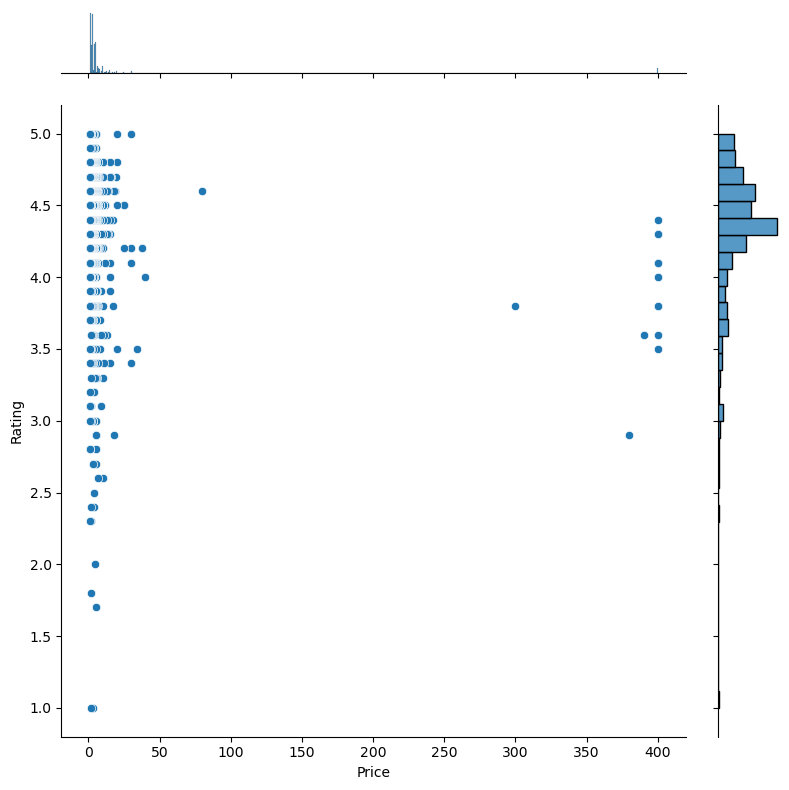

In [44]:
#  a jointPlot of Rating vs Price

#  a jointPlot of Rating vs Price

ratingvsprice = sns.jointplot(x = paid_app ['Price'], y = paid_app ['Rating'],kind='scatter',height=8, ratio=7, space=0.5)

## 7. Relation between app category and app price
##### Task 7: Instructions
Use a strip plot to visualize the distribution of paid apps across different categories.

Plot a strip plot with x-axis extending along the Price range and y-axis depicting the Category. Find apps priced above $200. Print the Category, App and Price columns for such apps. Here are some interesting websites that can estimate app price:

Estimate my app How much to make an app Helpful links:

-stripplot() documentation -Filter rows in pandas

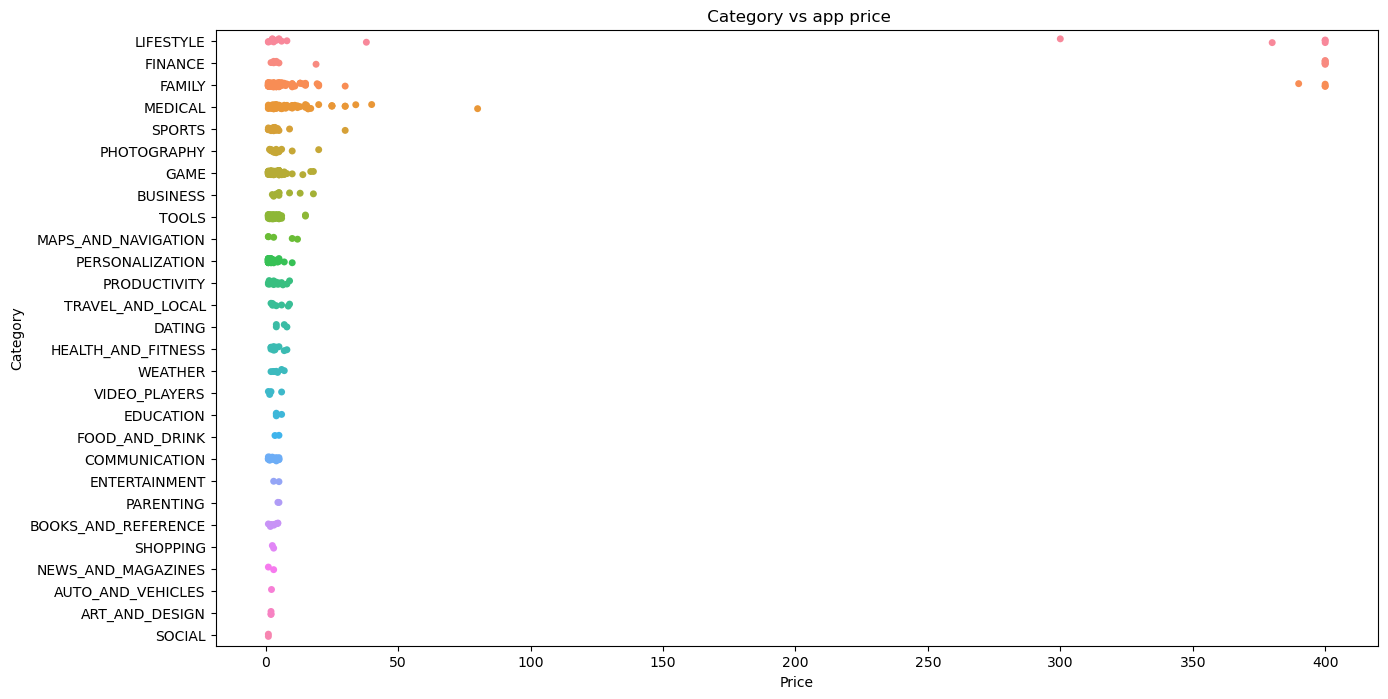

In [45]:
plt.figure(figsize=(15, 8))
categoryvsapp = sns.stripplot(x='Price', y = 'Category', data =paid_app,size=5)
plt.title(' Category vs app price')
plt.show()

In [46]:
#apps greater than $200
Apps_price_200 = paid_app[paid_app['Price']>200]
Apps_price_200

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6132,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000.0,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
6068,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000.0,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
6070,I Am Rich Pro,FAMILY,4.4,201,2.7M,5000.0,Paid,399.99,Everyone,Entertainment,30-May-17,1.54,1.6 and up
6060,I am rich,LIFESTYLE,3.8,3547,1.8M,100000.0,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
6064,I am Rich,FINANCE,4.3,180,3.8M,5000.0,Paid,399.99,Everyone,Finance,22-Mar-18,1,4.2 and up
7283,most expensive app (H),FAMILY,4.3,6,1.5M,100.0,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
3939,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000.0,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
6067,I am Rich Plus,FAMILY,4.0,856,8.7M,10000.0,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
6065,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,1000.0,Paid,399.99,Teen,Finance,6-Dec-17,2,4.0.3 and up
6071,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000.0,Paid,399.99,Everyone,Finance,25-Jun-18,1.0.2,4.1 and up


In [47]:
#selected a particular columns of apps greater tha $200
Apps_price_morethan200_selected = Apps_price_200.iloc[:,[0,1,7]]
Apps_price_morethan200_selected 

,App,Category,Price
6132,I'm Rich - Trump Edition,LIFESTYLE,400.00
6068,I Am Rich Premium,FINANCE,399.99
6070,I Am Rich Pro,FAMILY,399.99
6060,I am rich,LIFESTYLE,399.99
6064,I am Rich,FINANCE,399.99
7283,most expensive app (H),FAMILY,399.99
3939,💎 I'm rich,LIFESTYLE,399.99
6067,I am Rich Plus,FAMILY,399.99
6065,I am rich (Most expensive app),FINANCE,399.99
6071,I AM RICH PRO PLUS,FINANCE,399.99


In [48]:
#popular app categories
popular_app_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY','MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]
popular_app_cats                                                                

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,.R,TOOLS,4.5,259,203k,10000.0,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
3,[adult swim],FAMILY,3.6,21433,21M,1000000.0,Free,0.00,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
6,[root] Pry-Fi,TOOLS,3.9,6736,72k,500000.0,Free,0.00,Everyone,Tools,2-Feb-14,1.2,4.2 and up
7,[ROOT] X Privacy Installer,TOOLS,4.2,12147,118k,1000000.0,Free,0.00,Everyone,Tools,25-Jan-15,1.18,4.0.3 and up
18,10 Minutes a Day Times Tables,FAMILY,4.1,681,48M,100000.0,Free,0.00,Everyone,Education,3-Jul-14,1.2,2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10828,ZOOKEEPER DX TouchEdition,FAMILY,4.2,3195,4.6M,100000.0,Paid,0.99,Everyone,Puzzle,26-Nov-15,1.2.7,2.1 and up
10829,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000.0,Free,0.00,Everyone,Business,20-Jul-18,4.1.28165.0716,4.0 and up
10832,Zoopla Property Search UK - Home to buy & rent,LIFESTYLE,4.1,21195,Varies with device,1000000.0,Free,0.00,Everyone,Lifestyle,22-Jun-18,Varies with device,Varies with device
10835,Zowi App,FAMILY,4.5,516,21M,50000.0,Free,0.00,Everyone,Education;Education,21-Dec-16,1.4.1,4.0.3 and up


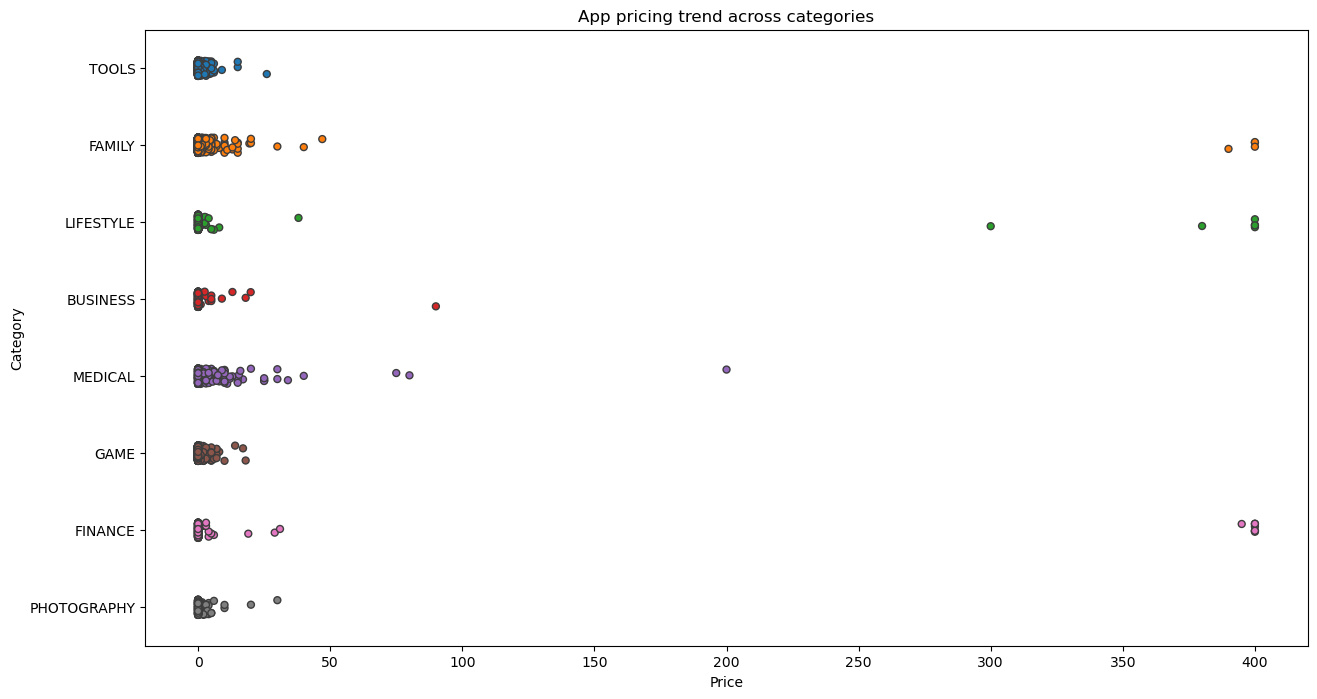

In [49]:
 #Examining the price trend by plotting Price vs Category of the popular app
 plt.figure(figsize=(15, 8))
 ax= sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1) 
ax.set_title('App pricing trend across categories')
plt.show()

### 8. Filter out "junk" apps
##### Task 8: Instructions


__Note: For simplicity, we will continue to use the popular_app_cats dataframe (from previous task) and not our original dataframe apps__

 - Select rows from popular_app_cats that contain apps priced below $100 and assign it to apps_under_100.
 - Re-plot your strip plot using apps_under_100 dataframe (instead of popular_app_cats used in the previous task).

In [50]:
#selecting app less than $100
app_under_100 =paid_app[paid_app['Price']<100]
app_under_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10186,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000.0,Paid,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up
6793,LTC AS Legal,MEDICAL,4.0,6,1.3M,100.0,Paid,39.99,Everyone,Medical,4-Apr-18,3.0.1,4.1 and up
6066,I am Rich Person,LIFESTYLE,4.2,134,1.8M,1000.0,Paid,37.99,Everyone,Lifestyle,18-Jul-17,1,4.0.3 and up
135,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000.0,Paid,33.99,Everyone,Medical,2-Oct-17,2.1.35,4.0 and up
5510,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25M,50000.0,Paid,29.99,Everyone,Sports,11-Jul-18,4.18.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,League of Stickman 2018- Ninja Arena PVP(Dream...,GAME,4.4,32496,99M,1000000.0,Paid,0.99,Teen,Action,3-Jul-18,5.3.3,2.3 and up
6666,Light X - Icon Pack,PERSONALIZATION,4.6,252,24M,10000.0,Paid,0.99,Everyone,Personalization,13-Jun-18,1.6.1,4.1 and up
6706,Little Magnet BT Pro,TOOLS,4.6,251,3.8M,1000.0,Paid,0.99,Everyone,Tools,5-Aug-18,4.1.4,4.2 and up
6743,Lock 'n' Roll Pro - Ad Free,GAME,4.6,169,13M,1000.0,Paid,0.99,Everyone,Card,1-Jul-15,4.0.5,2.3.3 and up


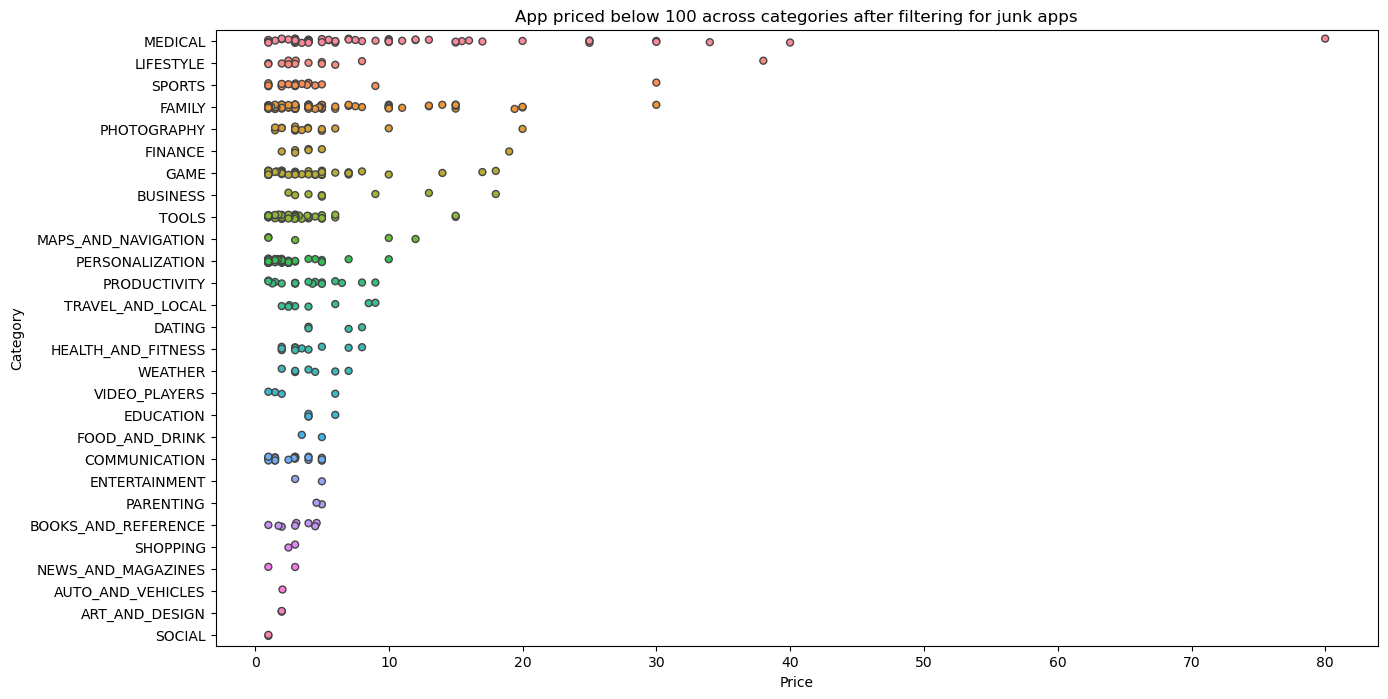

In [51]:
#ploting the app categories below 100 dollars 
plt.figure(figsize=(15, 8))
ax= sns.stripplot(x = app_under_100['Price'], y = app_under_100['Category'], jitter=True, linewidth=1) 
ax.set_title('App priced below 100 across categories after filtering for junk apps')
plt.show()

## 9.Popularity of paid apps vs free apps
##### Task 9: Instructions
Prep the data for a box plot that compares the number of installs of paid apps vs. number of installs of free apps.

 - From apps, filter rows where for Type == Paid, and select the Installs column and assign it to y of trace0.
 - From apps, filter rows where for Type == Free, and select the Installs column and assign it to y of trace1. 

In [52]:
#checking app price
App_price = df_noNaN.iloc[:,[0,1,5,6]]
App_price

,App,Category,Installs,Type
1,.R,TOOLS,10000.0,Free
2,/u/app,COMMUNICATION,10000.0,Free
3,[adult swim],FAMILY,1000000.0,Free
4,[BN] Blitz,SPORTS,100.0,Free
6,[root] Pry-Fi,TOOLS,500000.0,Free
...,...,...,...,...
10836,ZUL - Rotativo Digital BH,AUTO_AND_VEHICLES,10000.0,Free
10837,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,1000000.0,Free
10838,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,1000000.0,Free
10839,Zynga Poker – Texas Holdem,GAME,50000000.0,Free


In [53]:
#subset data of apps that are free
App_price_Free = App_price[App_price['Type']=='Free']
App_price_Free

,App,Category,Installs,Type
1,.R,TOOLS,10000.0,Free
2,/u/app,COMMUNICATION,10000.0,Free
3,[adult swim],FAMILY,1000000.0,Free
4,[BN] Blitz,SPORTS,100.0,Free
6,[root] Pry-Fi,TOOLS,500000.0,Free
...,...,...,...,...
10836,ZUL - Rotativo Digital BH,AUTO_AND_VEHICLES,10000.0,Free
10837,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,1000000.0,Free
10838,Zumper - Apartment Rental Finder,HOUSE_AND_HOME,1000000.0,Free
10839,Zynga Poker – Texas Holdem,GAME,50000000.0,Free


In [54]:
#subset data of apps that are paid
App_price_Paid = App_price[App_price['Type']=='Paid']
App_price_Paid

,App,Category,Installs,Type
8,[Sub/EMUI] P Pro - EMUI 8.1/8.0/5.X Theme,PERSONALIZATION,100.0,Paid
19,10 WPM Amateur ham radio CW Morse code trainer,COMMUNICATION,100.0,Paid
20,"10,000 Quotes DB (Premium)",BOOKS_AND_REFERENCE,500.0,Paid
29,17th Edition Cable Sizer,BOOKS_AND_REFERENCE,1000.0,Paid
34,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,100.0,Paid
...,...,...,...,...
10751,Z Origins - (Z The Game),FAMILY,50000.0,Paid
10769,ZArchiver Donate,TOOLS,10000.0,Paid
10801,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,1000000.0,Paid
10825,ZombieVital DG,FAMILY,100.0,Paid


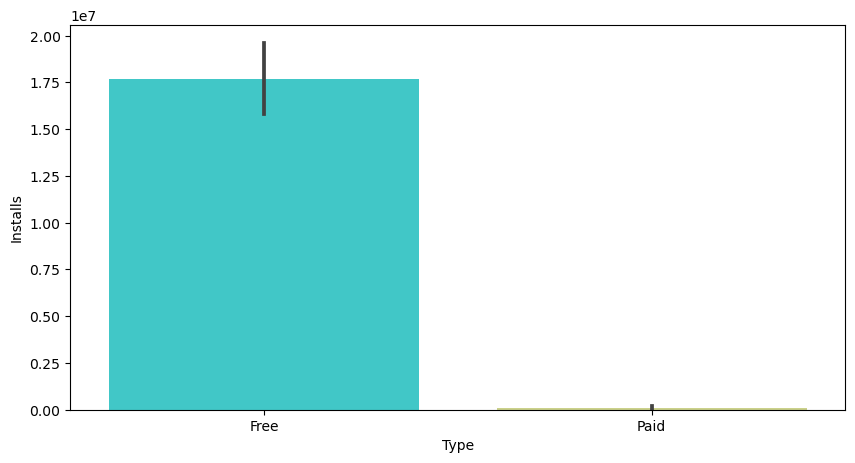

In [55]:
# to check the app type that are mostly installed
plt.figure(figsize=(10, 5))
sns.barplot(x= 'Type', y= 'Installs',  data = App_price , palette ='rainbow')
plt.show()

### 10. Sentiment analysis of user reviews

In [56]:
# app data url
url_review = 'https://github.com/adeyeyesaidah/googleplaystore/blob/main/googleplaystore_user_reviews.csv?raw=true'

In [57]:
#reading the review data as df_review
df_review = pd.read_csv(url_review)

In [58]:
#checking the head of the data
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [59]:
# merging the two data sets on the app column
df_merged =  df.merge(df_review[['App','Translated_Review','Sentiment',	'Sentiment_Polarity',	'Sentiment_Subjectivity']])
df_merged 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,NaN,NaN,NaN,NaN
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100214,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"As I said, keeps telling home weather Durango,...",Positive,0.312500,0.500000
100215,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"The sound hear, working, please fix problem",Positive,0.400000,0.400000
100216,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,More go gym today I going first best time favo...,Positive,0.583333,0.377778
100217,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"After updating my phone does not work at all, ...",Positive,0.066667,0.600000


In [60]:
#droping the NaN value
df_merged = df_merged.dropna(subset = ['Sentiment', 'Reviews'])
df_merged 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100214,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"As I said, keeps telling home weather Durango,...",Positive,0.312500,0.500000
100215,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"The sound hear, working, please fix problem",Positive,0.400000,0.400000
100216,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,More go gym today I going first best time favo...,Positive,0.583333,0.377778
100217,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"After updating my phone does not work at all, ...",Positive,0.066667,0.600000


Text(0.5, 1.0, 'Sentiment Polarity Distribution')

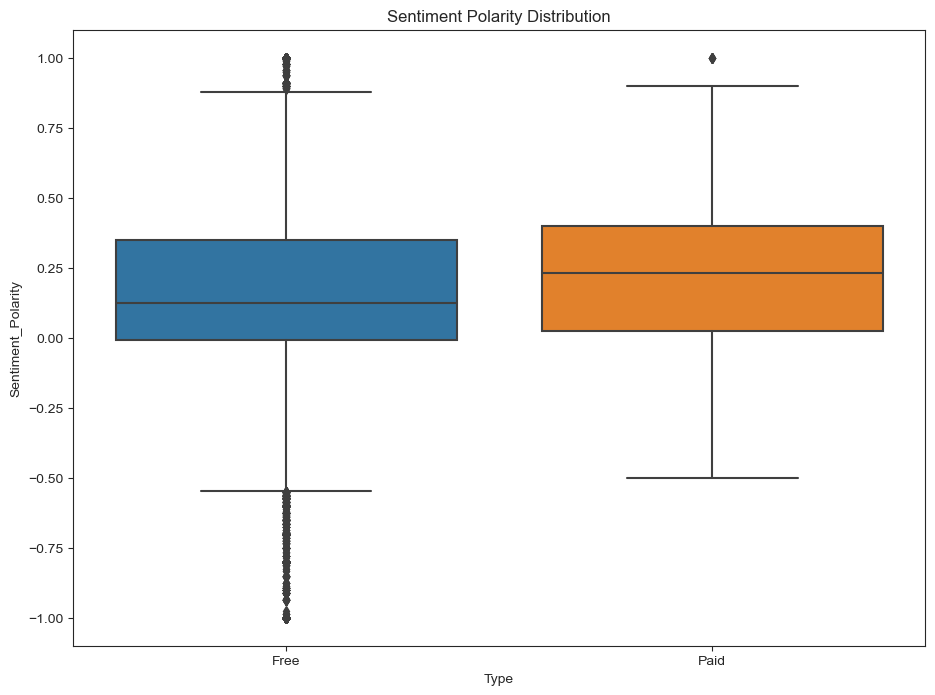

In [61]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity', data =df_merged)
ax.set_title('Sentiment Polarity Distribution')

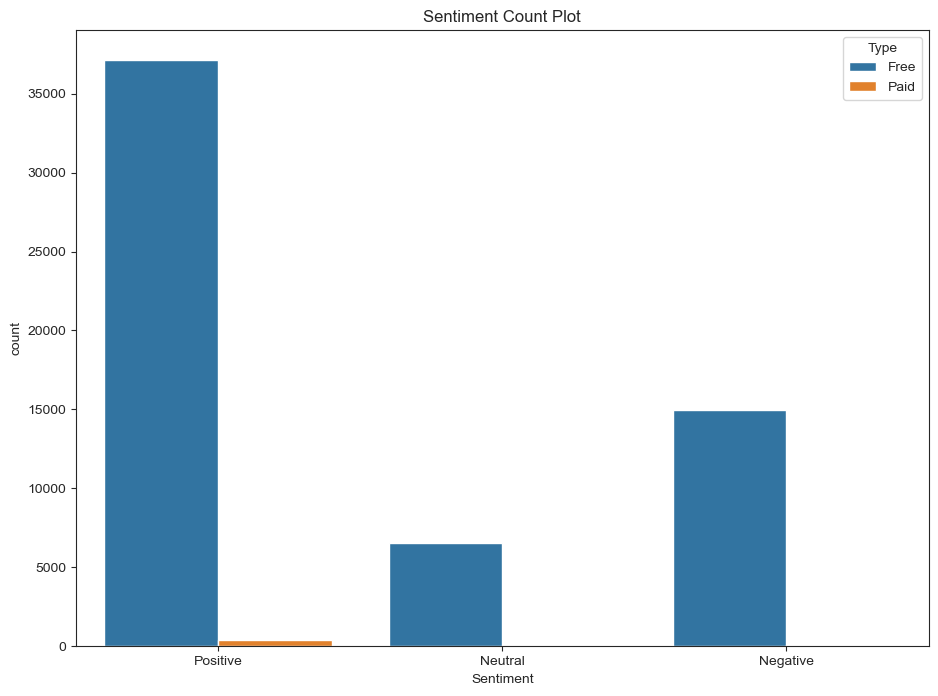

In [62]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.countplot(x = 'Sentiment',hue='Type', data =df_merged)
ax.set_title('Sentiment Count Plot')
plt.show()

In [63]:
df_merged_Paid = df_merged[df_merged['Type']=='Paid']
df_merged_Paid 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
19746,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,24-Aug-16,5.7.8,2.3 and up,It's lovely widget app. But I'm gonna hold 2 s...,Positive,0.340000,0.550000
19747,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,24-Aug-16,5.7.8,2.3 and up,This first I used OD (original droid)! And usi...,Positive,0.625000,0.541667
19748,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,24-Aug-16,5.7.8,2.3 and up,Ghost adventure I like it.. If widget could st...,Positive,0.490476,0.473810
19749,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,24-Aug-16,5.7.8,2.3 and up,"Ghost widget issue? My widget continues ""ghost...",Positive,0.184343,0.451515
19750,Beautiful Widgets Pro,PERSONALIZATION,4.2,97890,14M,1000000.0,Paid,2.49,Everyone,Personalization,24-Aug-16,5.7.8,2.3 and up,Used love This used great. Since last update u...,Positive,0.260000,0.303333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92236,HD Widgets,PERSONALIZATION,4.3,58614,26M,1000000.0,Paid,0.99,Everyone,Personalization,7-Dec-16,4.3.2,4.4 and up,I've used Note 4 problem since I bought Note 8...,Negative,-0.087755,0.412925
92237,HD Widgets,PERSONALIZATION,4.3,58614,26M,1000000.0,Paid,0.99,Everyone,Personalization,7-Dec-16,4.3.2,4.4 and up,Great app...easy set customize liking! Been us...,Positive,0.308929,0.421429
92238,HD Widgets,PERSONALIZATION,4.3,58614,26M,1000000.0,Paid,0.99,Everyone,Personalization,7-Dec-16,4.3.2,4.4 and up,Worked great samsung devices UNTIL bought note...,Positive,0.225000,0.437500
92239,HD Widgets,PERSONALIZATION,4.3,58614,26M,1000000.0,Paid,0.99,Everyone,Personalization,7-Dec-16,4.3.2,4.4 and up,I'm seriously disappointed response dev. The w...,Negative,-0.044444,0.483333


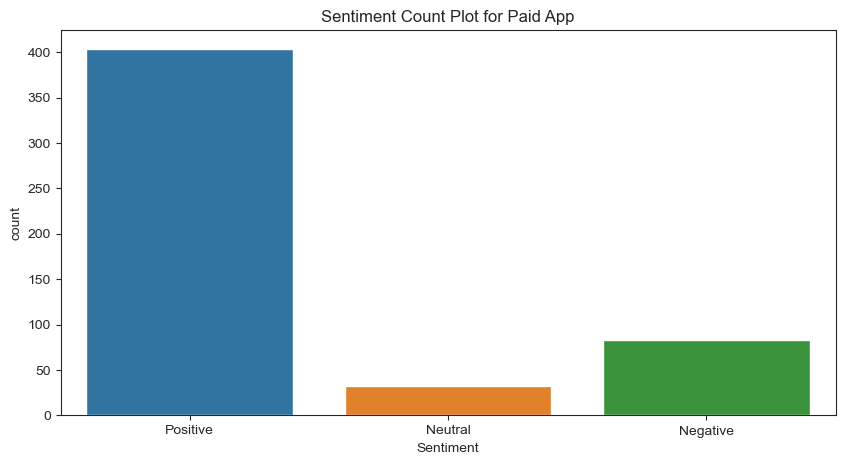

In [64]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.countplot(x = 'Sentiment', data =df_merged_Paid )
ax.set_title('Sentiment Count Plot for Paid App')
plt.show()

In [65]:
df_merged_Free= df_merged[df_merged['Type']=='Free']
df_merged_Free 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000.0,Free,0.0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100214,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"As I said, keeps telling home weather Durango,...",Positive,0.312500,0.500000
100215,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"The sound hear, working, please fix problem",Positive,0.400000,0.400000
100216,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,More go gym today I going first best time favo...,Positive,0.583333,0.377778
100217,HTC Weather,WEATHER,3.9,22154,Varies with device,10000000.0,Free,0.0,Everyone,Weather,10-Aug-17,8.50.935520,4.4 and up,"After updating my phone does not work at all, ...",Positive,0.066667,0.600000


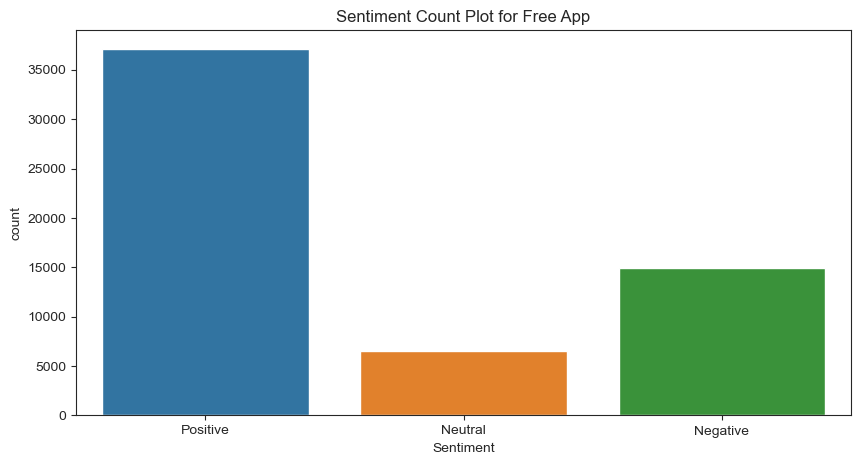

In [66]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax = sns.countplot(x = 'Sentiment', data =df_merged_Free )
ax.set_title('Sentiment Count Plot for Free App')
plt.show()

### **THE** **END**